In [1]:
!pip install pycombo

In [1]:
import datetime
import calendar
import collections
from operator import itemgetter

import numpy as np
import pandas as pd

# Networks 
import networkx as nx
# Community Detection
import community as community_louvain 
import pycombo 

# Visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

# Interactive Maps/Visaualization
import folium
from folium import plugins
import plotly.graph_objects as go

In [3]:
!pip install igraph

In [2]:
from igraph import *
import igraph

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
dataframe=pd.read_csv('/content/drive/MyDrive/SNA/database.csv')
dataframe.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4
12157457,2017-10-30 23:59:00,2017-10-31 00:12:00,20.0,Kaisaniemenpuisto,114.0,Ratapihantie,2856.0,771.0,0.222257,60.173199,24.943301,60.196431,24.936256,0.4


In [5]:
dataframe.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

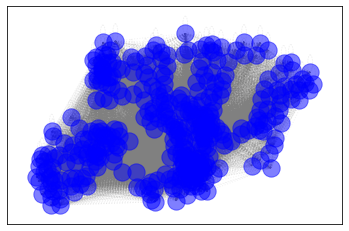

In [6]:
def bikeNetwork(dataframe):
    df = dataframe.copy()
    df.dropna(inplace=True)
    G = nx.Graph()
    G = nx.from_pandas_edgelist(df, 'departure_name', 'return_name', edge_attr=['duration (sec.)','distance (m)'])

    

    # Positions
    stations  = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
    stations.set_index('name',inplace=True)
    stations["pos"] = list(zip(stations["longitude"].astype(float), stations["latitude"].astype(float)))
    pos = stations.to_dict()['pos']

    # Map "pos" atribute to nodes from pos dict
    for node, position in pos.items():
        try:
            G.nodes[node]['pos'] = position
        except KeyError:
            pass

    # Draw
    nx.draw_networkx_nodes(G=G,pos=G.nodes.data('pos'), node_color='blue', alpha=0.5)
    nx.draw_networkx_edges(G=G,pos=G.nodes.data('pos'), edge_color='grey', style ="dotted", alpha=0.1, arrows=False)
    
    return G

G = bikeNetwork(dataframe)

In [7]:
nx.info(G)

'Graph with 347 nodes and 36462 edges'

In [8]:

G.degree()

DegreeView({'Kuusitie': 281, 'Esterinportti': 279, 'Kamppi (M)': 302, 'Kasarmitori': 215, 'Porolahden koulu': 155, 'Agnetankuja': 162, 'Vallipolku': 139, 'Korppaanmäentie': 257, 'Länsisatamankatu': 273, 'Vilhonvuorenkatu': 257, 'Radiokatu': 248, 'Porthania': 267, 'Tyynenmerenkatu': 233, 'Hietalahdentori': 278, 'Itämerentori': 314, 'Meilahden sairaala': 277, 'Koskelantie': 264, 'Kalasatama (M)': 268, 'Rautatieläisenkatu': 277, 'A.I. Virtasen aukio': 218, 'Töölönkatu': 260, 'Rautatientori / itä': 288, 'Roihupelto': 138, 'Siilitie (M)': 166, 'Hakaniemi (M)': 268, 'Rajasaarentie': 260, 'Näkinsilta': 261, 'Kiasma': 271, 'Senaatintori': 242, 'Rautatientori / länsi': 295, 'Olympiastadion': 274, 'Tilkanvierto': 290, 'Stenbäckinkatu': 267, 'Pohjankulma': 203, 'Kalevalantie': 202, 'Tulisuontie': 132, 'Herttoniemi (M)': 212, 'Päijänteentie': 245, 'Kauppakorkeakoulu': 247, 'Nordenskiöldinaukio': 277, 'Brahen puistikko': 259, 'Vanha Viertotie': 245, 'Elimäenkatu': 268, 'Ympyrätalo': 296, 'Jätkäsaar

In [9]:


x=sorted([d for n, d in G.degree()],reverse=True)
for d in x[:5]:
        print(d)


328
314
305
302
300


In [10]:
y=sorted(G.degree(),key=lambda y: y[1],reverse=True)
for d in y[:5]:
        print(d)

('Haukilahdenkatu', 328)
('Itämerentori', 314)
('Laajalahden aukio', 305)
('Kamppi (M)', 302)
('Töölönlahdenkatu', 300)


In [11]:
degreeCount = collections.Counter(x)
deg, cnt = zip(*degreeCount.items())
x=sum(deg)/len(deg)

In [12]:
degreeCount

Counter({73: 1,
         76: 1,
         77: 1,
         85: 1,
         88: 1,
         90: 1,
         95: 1,
         98: 1,
         99: 1,
         100: 1,
         101: 1,
         103: 1,
         105: 2,
         106: 1,
         108: 4,
         110: 1,
         111: 2,
         112: 2,
         113: 1,
         115: 2,
         116: 1,
         117: 1,
         119: 1,
         120: 1,
         121: 1,
         123: 1,
         124: 2,
         125: 1,
         126: 3,
         127: 1,
         128: 2,
         130: 4,
         132: 2,
         134: 2,
         135: 1,
         136: 3,
         138: 1,
         139: 1,
         140: 3,
         141: 2,
         142: 1,
         144: 3,
         145: 4,
         146: 1,
         149: 2,
         150: 2,
         151: 1,
         154: 1,
         155: 3,
         158: 2,
         160: 1,
         161: 1,
         162: 1,
         163: 1,
         164: 1,
         165: 1,
         166: 2,
         167: 2,
         168: 1,
      

In [13]:
x

200.10982658959537

Average degree of a node in the graph is approximately 200

<BarContainer object of 173 artists>

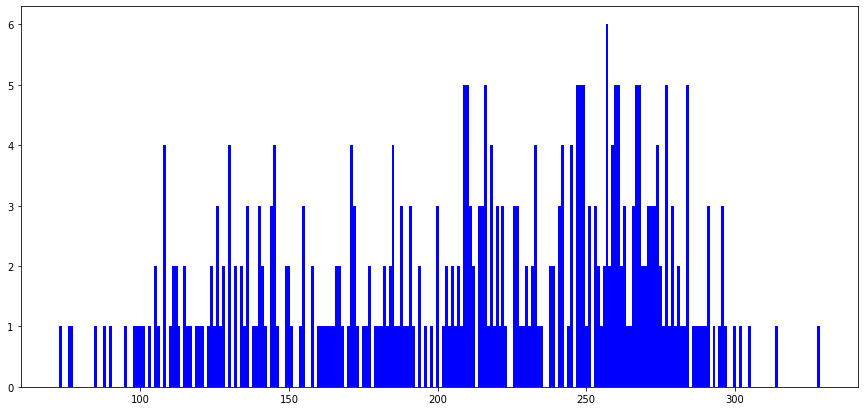

In [14]:
fig,ax=plt.subplots(figsize=(15,7))
plt.bar(deg, cnt, width=1, color='blue')

Conclusion: 
Haukilahdenkatu has the highest no of degrees(degree centrality) equal to 200. It implies that people make trips to and from Haukilahdenkatu on a regular basis. This means Haukilahdenkatu station is nearer to an important point of interest. 
As we have already found out avg degree of a node in the graph is approximately 200. This means a bike station on an average is connected to 200 nodes.

Betweenness Centrality

In [15]:
betweenness_dict = nx.betweenness_centrality(G)

In [16]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
sorted_betweenness

[('Haukilahdenkatu', 0.00713446536080233),
 ('Itämerentori', 0.00489579608404948),
 ('Kamppi (M)', 0.0037203436342368394),
 ('Narinkka', 0.0037100453274895857),
 ('Kaisaniemenpuisto', 0.0036511354086210643),
 ('Töölönlahdenkatu', 0.003633327428329503),
 ('Laajalahden aukio', 0.003570207249204389),
 ('Ympyrätalo', 0.0032789587794761735),
 ('Rautatientori / länsi', 0.003148318188416619),
 ('Baana', 0.0030631415349939243),
 ('Rautatientori / itä', 0.003002706236461327),
 ('Sörnäinen (M)', 0.0029796806651420107),
 ('Huopalahdentie', 0.002949286899754881),
 ('Vanha kirkkopuisto', 0.0029107449545250114),
 ('Paciuksenkaari', 0.002804800410135715),
 ('Aalto-yliopisto (M), Korkeakouluaukio', 0.0027415454368987196),
 ('Korjaamo', 0.0027310238797426914),
 ('Fleminginkatu', 0.0026942958825671164),
 ('Marian sairaala', 0.0026873487033706473),
 ('Munkkiniemen aukio', 0.002660108114456435),
 ('Töölöntulli', 0.0026364136192060894),
 ('Lauttasaaren ostoskeskus', 0.002574327282882113),
 ('Mäkelänkatu', 

In [17]:
for b in sorted_betweenness[:5]:
        print(b)

('Haukilahdenkatu', 0.00713446536080233)
('Itämerentori', 0.00489579608404948)
('Kamppi (M)', 0.0037203436342368394)
('Narinkka', 0.0037100453274895857)
('Kaisaniemenpuisto', 0.0036511354086210643)


Haukilahdenkatu has highest betweenness centrality. This is no brainer that Haukilahdenkatu has both highest degree centrality and betweenness centrality because as Haukilahdenkatu has highest no of degrees that means it also most likely must be connecting different nodes. Itamerentori also have high betweenness centrality.

In [18]:

t5=sorted([d for n, d in sorted_betweenness],reverse=True)
for d in t5[:5]:
        print(d)


0.00713446536080233
0.00489579608404948
0.0037203436342368394
0.0037100453274895857
0.0036511354086210643


In [19]:
degreeCount = collections.Counter(t5)
deg, cnt = zip(*degreeCount.items())


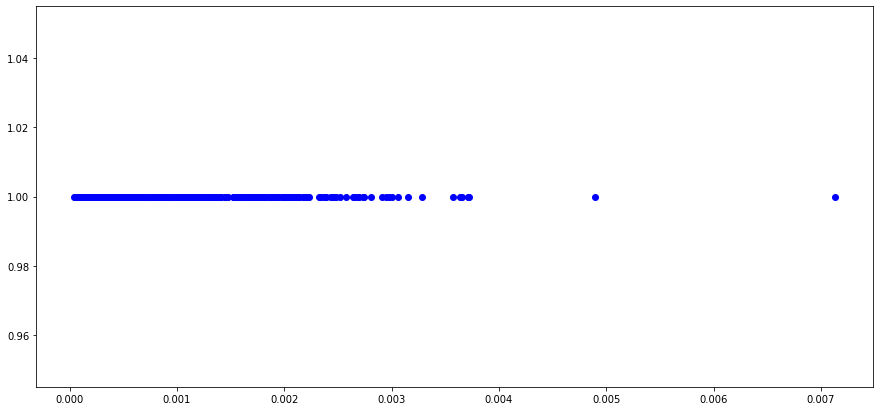

In [20]:
fig,ax=plt.subplots(figsize=(15,7))

plt.scatter(deg,cnt,color='blue')

Closeness Centrality

In [21]:
closeness=nx.closeness_centrality(G)
sorted_closeness=sorted(closeness.items(),key=itemgetter(1),reverse=True)
sorted_closeness

[('Haukilahdenkatu', 0.9453551912568307),
 ('Itämerentori', 0.9105263157894737),
 ('Laajalahden aukio', 0.8894601542416453),
 ('Kamppi (M)', 0.8826530612244898),
 ('Töölönlahdenkatu', 0.8781725888324873),
 ('Paciuksenkaari', 0.871536523929471),
 ('Ympyrätalo', 0.8693467336683417),
 ('Kaisaniemenpuisto', 0.8693467336683417),
 ('Huopalahdentie', 0.8693467336683417),
 ('Rautatientori / länsi', 0.8671679197994987),
 ('Narinkka', 0.8628428927680798),
 ('Korjaamo', 0.858560794044665),
 ('Munkkiniemen aukio', 0.858560794044665),
 ('Töölöntulli', 0.858560794044665),
 ('Tilkanvierto', 0.8564356435643564),
 ('Baana', 0.854320987654321),
 ('Rautatientori / itä', 0.8522167487684729),
 ('Sörnäinen (M)', 0.8501228501228502),
 ('Diakoniapuisto', 0.8480392156862745),
 ('Fleminginkatu', 0.8439024390243902),
 ('Vanha kirkkopuisto', 0.8439024390243902),
 ('Aalto-yliopisto (M), Korkeakouluaukio', 0.8439024390243902),
 ('Messeniuksenkatu', 0.8439024390243902),
 ('Lehtisaarentie', 0.8439024390243902),
 ('Et

In [22]:
for t in sorted_closeness[:5]:
        print(t)

('Haukilahdenkatu', 0.9453551912568307)
('Itämerentori', 0.9105263157894737)
('Laajalahden aukio', 0.8894601542416453)
('Kamppi (M)', 0.8826530612244898)
('Töölönlahdenkatu', 0.8781725888324873)


Haukilahdenkatu has the highest closeness centrality. This is also given since Haukilahdenkatu has the highest number of degrees which means people take frequent trips to Haukilahdenkatu. One of the major reasons for this is Haukilahdenkatu must be at the center of town so it is in close proximity to the people of Helsinki due to which they're making frequent trips. Apart from Haukilahdenkatu, Itämerentori and Laajalahden aukio also have high closeness centrality

In [23]:
t6=sorted([d for n,d in sorted_closeness],reverse=True)
degreeCount = collections.Counter(t6)
deg, cnt = zip(*degreeCount.items())


In [24]:
degreeCount

Counter({0.5571658615136876: 1,
         0.5598705501618123: 1,
         0.5607779578606159: 1,
         0.5681444991789819: 1,
         0.570957095709571: 1,
         0.571900826446281: 1,
         0.5776293823038398: 1,
         0.5795644891122278: 1,
         0.5815126050420169: 1,
         0.5824915824915825: 1,
         0.5834738617200674: 1,
         0.5854483925549916: 1,
         0.5874363327674024: 2,
         0.5884353741496599: 1,
         0.590443686006826: 4,
         0.5924657534246576: 1,
         0.5934819897084048: 2,
         0.5945017182130584: 2,
         0.5955249569707401: 1,
         0.5975820379965457: 2,
         0.5986159169550173: 1,
         0.5996533795493935: 1,
         0.6017391304347826: 1,
         0.6027874564459931: 1,
         0.6038394415357766: 1,
         0.6059544658493871: 1,
         0.6070175438596491: 2,
         0.6080843585237259: 1,
         0.6091549295774648: 3,
         0.6102292768959435: 1,
         0.6113074204946997: 2,
         0.

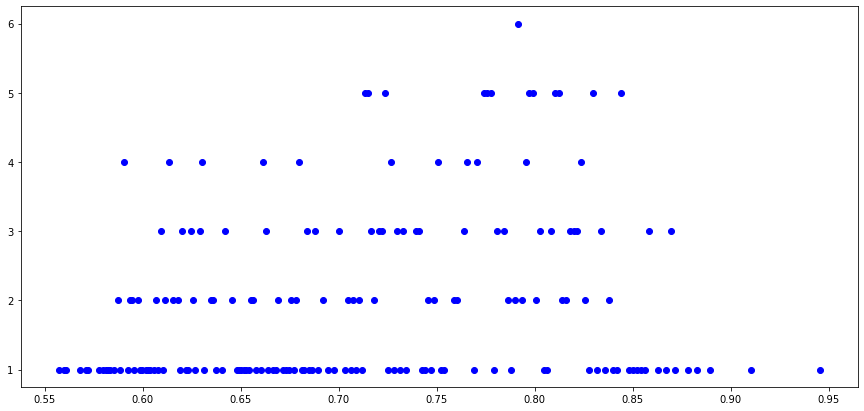

In [25]:
fig,ax=plt.subplots(figsize=(15,7))

plt.scatter(deg,cnt,color='blue')

Eigenvector Centrality

In [26]:
eigenvector=nx.eigenvector_centrality(G)
eigenvector

{'A.I. Virtasen aukio': 0.05672856486146217,
 'Aalto-yliopisto (M), Korkeakouluaukio': 0.06733202017952142,
 'Aalto-yliopisto (M), Tietotie': 0.05628619889990218,
 'Abraham Wetterin tie': 0.04139558392731589,
 'Agnetankuja': 0.039227114567288425,
 'Agronominkatu': 0.03946546163613187,
 'Ahertajantie': 0.04132240063038489,
 'Alakiventie': 0.020029676553132033,
 'Albertinkatu': 0.06348755867114209,
 'Annankatu': 0.0631231151147187,
 'Apollonkatu': 0.0688388049015624,
 'Arabian kauppakeskus': 0.06522257062240719,
 'Arabiankatu': 0.06426006426877105,
 'Arielinkatu': 0.06053886048451629,
 'Asentajanpuisto': 0.04115859548348916,
 'Aulangontie': 0.04197762557053689,
 'Auringonkatu': 0.030566287870987394,
 'Avaruuskatu': 0.01942739868394113,
 'Baana': 0.0703772161520264,
 'Betonimies': 0.053888497422833886,
 'Brahen kenttä': 0.06761852156438213,
 'Brahen puistikko': 0.06517202733966243,
 'Cygnaeuksenkatu': 0.06015842814895531,
 'Derby Business Park': 0.01789445723094259,
 'Designmuseo': 0.0579

In [27]:
sorted_eigenvector=sorted(eigenvector.items(),key=itemgetter(1),reverse=True)
sorted_eigenvector

[('Haukilahdenkatu', 0.07518513059120188),
 ('Itämerentori', 0.07377579534470748),
 ('Laajalahden aukio', 0.07287473495722124),
 ('Kamppi (M)', 0.07251984669873815),
 ('Töölönlahdenkatu', 0.07240395717725923),
 ('Paciuksenkaari', 0.07200478935441529),
 ('Huopalahdentie', 0.0719509082791253),
 ('Ympyrätalo', 0.0716977757035093),
 ('Rautatientori / länsi', 0.07158458525693498),
 ('Töölöntulli', 0.07138028991994255),
 ('Korjaamo', 0.07136156405311259),
 ('Tilkanvierto', 0.07127178757414841),
 ('Kaisaniemenpuisto', 0.0709494753888168),
 ('Munkkiniemen aukio', 0.0709118007265225),
 ('Narinkka', 0.07078434002917187),
 ('Diakoniapuisto', 0.07045072293117978),
 ('Baana', 0.0703772161520264),
 ('Eteläinen Hesperiankatu', 0.07016493957170845),
 ('Messeniuksenkatu', 0.0701373848315016),
 ('Rautatientori / itä', 0.06997919677159668),
 ('Tenholantie', 0.0698733032347928),
 ('Kuusitie', 0.06982471845978172),
 ('Sörnäinen (M)', 0.06969991668955526),
 ('Vanha kirkkopuisto', 0.06945647747652686),
 ('Oo

In [28]:
for t in sorted_eigenvector[:5]:
        print(t)

('Haukilahdenkatu', 0.07518513059120188)
('Itämerentori', 0.07377579534470748)
('Laajalahden aukio', 0.07287473495722124)
('Kamppi (M)', 0.07251984669873815)
('Töölönlahdenkatu', 0.07240395717725923)


In [29]:
t7=sorted([d for n,d in sorted_eigenvector],reverse=True)
degreeCount = collections.Counter(t7)
deg, cnt = zip(*degreeCount.items())


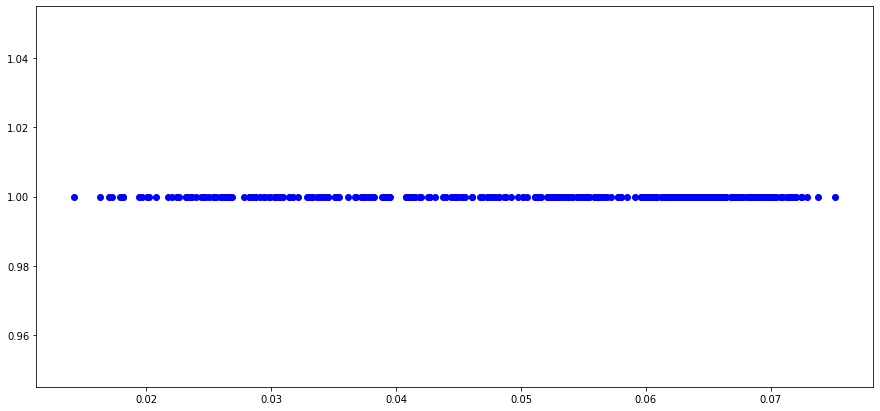

In [30]:
fig,ax=plt.subplots(figsize=(15,7))

plt.scatter(deg,cnt,color='blue')

Conclusion:
Haukilahdenkatu has highest eigenvector centrality. This means Haukilahdenkatu is the most important station as it's neighbours are those who themselves are connected to many other stations. Itamerentori and Laajalahden aukio are also important stations.

Pagerank Centrality

In [31]:
pagerank=nx.pagerank(G)
pagerank

{'A.I. Virtasen aukio': 0.0029364306240015673,
 'Aalto-yliopisto (M), Korkeakouluaukio': 0.003769177733021174,
 'Aalto-yliopisto (M), Tietotie': 0.003243304916659689,
 'Abraham Wetterin tie': 0.002450546070724548,
 'Agnetankuja': 0.0023305479274433405,
 'Agronominkatu': 0.002383486069748388,
 'Ahertajantie': 0.0026582850218117085,
 'Alakiventie': 0.0016143081086448057,
 'Albertinkatu': 0.0032922641091317605,
 'Annankatu': 0.0032807234451251452,
 'Apollonkatu': 0.0035836378237926784,
 'Arabian kauppakeskus': 0.0034932973596494723,
 'Arabiankatu': 0.003414043371464274,
 'Arielinkatu': 0.00324348080149646,
 'Asentajanpuisto': 0.00243931377094286,
 'Aulangontie': 0.0024214315509069498,
 'Auringonkatu': 0.0021155491561996452,
 'Avaruuskatu': 0.0016601012211478812,
 'Baana': 0.0038017562656958424,
 'Betonimies': 0.0030245205232787486,
 'Brahen kenttä': 0.0035908666836442405,
 'Brahen puistikko': 0.003433560318759679,
 'Cygnaeuksenkatu': 0.0030392678137698094,
 'Derby Business Park': 0.001313

In [32]:
sorted_pagerank=sorted(pagerank.items(),key=itemgetter(1),reverse=True)
sorted_pagerank

[('Haukilahdenkatu', 0.00431965900734245),
 ('Itämerentori', 0.00412750452519659),
 ('Laajalahden aukio', 0.004003204459193389),
 ('Kamppi (M)', 0.003964559022112063),
 ('Töölönlahdenkatu', 0.003938348877990376),
 ('Kaisaniemenpuisto', 0.003897151930804098),
 ('Paciuksenkaari', 0.003895174227627984),
 ('Ympyrätalo', 0.0038899084212407203),
 ('Huopalahdentie', 0.0038823920721154153),
 ('Rautatientori / länsi', 0.0038731303796092896),
 ('Narinkka', 0.003860735355514737),
 ('Munkkiniemen aukio', 0.003822221537375289),
 ('Korjaamo', 0.00381675984666356),
 ('Töölöntulli', 0.003814995756879654),
 ('Baana', 0.0038017562656958424),
 ('Tilkanvierto', 0.0038015449836469087),
 ('Rautatientori / itä', 0.003794483668456338),
 ('Sörnäinen (M)', 0.0037864038725811764),
 ('Aalto-yliopisto (M), Korkeakouluaukio', 0.003769177733021174),
 ('Diakoniapuisto', 0.003753881160334786),
 ('Lehtisaarentie', 0.0037491357921800926),
 ('Fleminginkatu', 0.003744783385330602),
 ('Vanha kirkkopuisto', 0.00374060435302

In [33]:
for t in sorted_pagerank[:5]:
        print(t)

('Haukilahdenkatu', 0.00431965900734245)
('Itämerentori', 0.00412750452519659)
('Laajalahden aukio', 0.004003204459193389)
('Kamppi (M)', 0.003964559022112063)
('Töölönlahdenkatu', 0.003938348877990376)


In [34]:
t8=sorted([d for n,d in sorted_pagerank],reverse=True)
degreeCount = collections.Counter(t8)
deg, cnt = zip(*degreeCount.items())


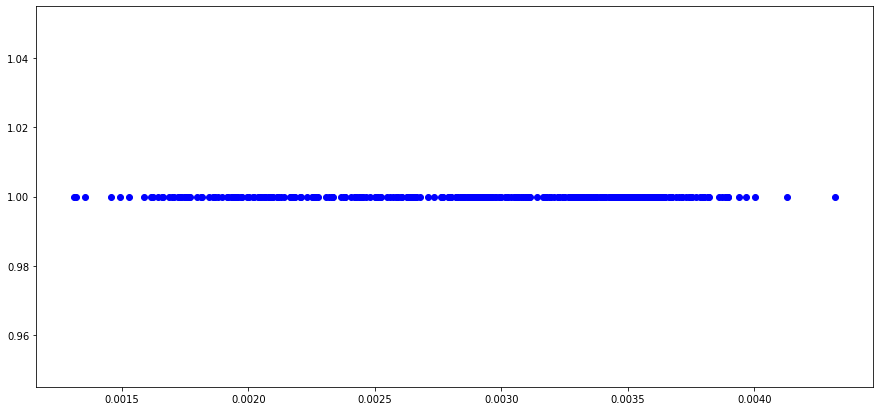

In [35]:
fig,ax=plt.subplots(figsize=(15,7))

plt.scatter(deg,cnt,color='blue')

Conclusion: Haukilahdenkatu has the highest pagerank centrality followed by Itamerentori and Laajalahden

In [36]:
cc=nx.average_clustering(G)
cc

0.7796808968676939

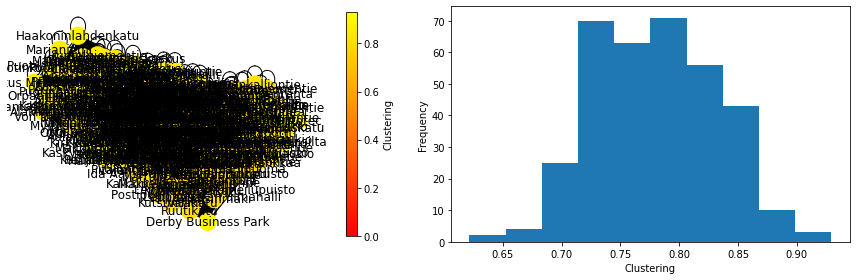

In [37]:
gc=G.subgraph(max(nx.connected_components(G)))
lcc=nx.clustering(gc)
cmap=plt.get_cmap('autumn')
norm=plt.Normalize(0,max(lcc.values()))
node_colors=[cmap(norm(lcc[node])) for node in gc.nodes]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [38]:
H=G.copy()

In [39]:
nx.info(H)

'Graph with 347 nodes and 36462 edges'

In [42]:



def edge_to_remove(g):
	
	d1 = nx.edge_betweenness_centrality(g)
	list_of_tuples = list(d1.items())
	
	sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
	
	# Will return in the form (a,b)
	return list_of_tuples[0][0]

def girvan(g):
	a = nx.connected_components(g)
	lena = len(list(a))
	print (' The number of connected components are ', lena)
	while (lena == 1):

		# We need (a,b) instead of ((a,b))
		u, v = edge_to_remove(g)
		g.remove_edge(u, v)
		
		a = nx.connected_components(g)
		lena=len(list(a))
		print (' The number of connected components are ', lena)
	
	return a

# Driver Code
H=G.copy()
a = girvan(H)


for i in a:
	print (i.nodes())
	print ('.............')



 The number of connected components are  1


KeyboardInterrupt: ignored

In [43]:
T=G.copy()

In [ ]:
for i in a:
    print (i.nodes())
    print ('.............')

In [ ]:
a.nodes()

AttributeError: ignored

In [ ]:
from networkx.algorithms.community import k_clique_communities
K5=nx.convert_node_labels_to_integers(T, first_label=2)
T.add_edges_from(K5.edges())
c = list(k_clique_communities(T, 2))
sorted(list(c[0]))

In [ ]:
import community

In [45]:
from networkx.algorithms import community

In [47]:
import networkx as nx
import community as community_louvain
from operator import itemgetter

In [50]:
comms = community_louvain.best_partition(G)

AttributeError: ignored

In [53]:
!pip install community
!pip install python-louvain

  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2154 sha256=4fef8242693f0d65e4e2cf59f198e105990725a9c86fd9f8fd7c78d17f5f5460
  Stored in directory: /root/.cache/pip/wheels/d9/cf/a6/01e9b603fca646a52b27e42d5c5613cb167c5258109d59ea23
Successfully built community


In [58]:
!pip uninstall community
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.7/dist-packages/community/community_status.py
Proceed (y/n)? y
  Successfully uninstalled community-1.0.0b1


In [67]:
import community.community_louvain

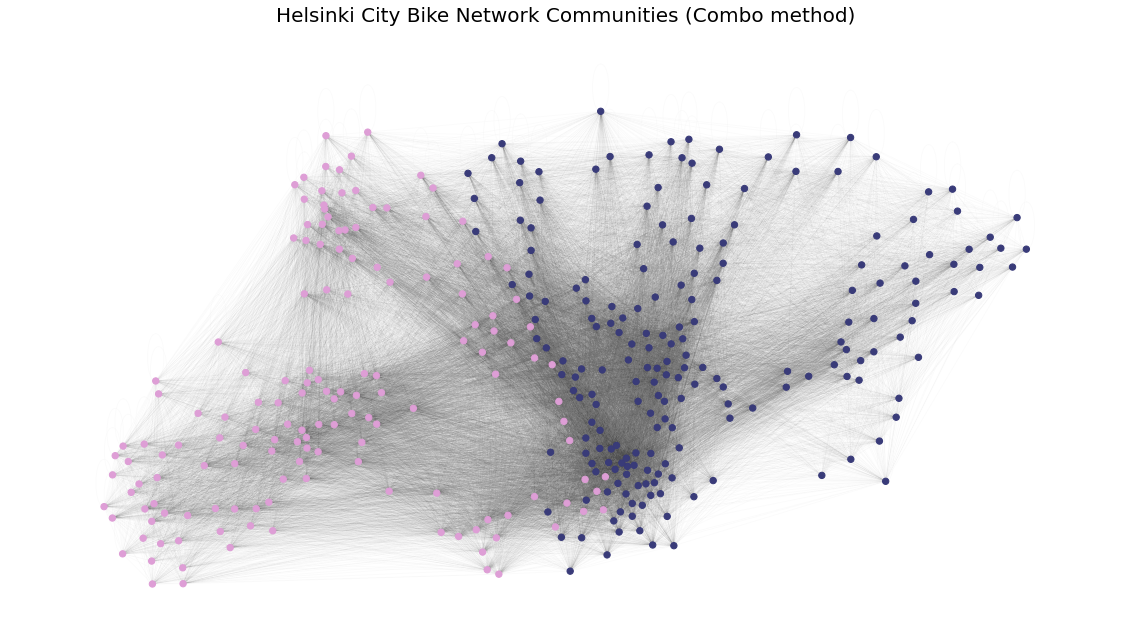

In [40]:
def communityCombo(G):
    """
    """
    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Partition
    partition, modularity = pycombo.execute(G, return_modularity=True, modularity_resolution= 1,  weight="duration", max_communities=2, random_seed=1)

    # Partition colormap
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)

    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Helsinki City Bike Network Communities (Combo method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')

    # Watermark
    

    plt.show()
communityCombo(G)

AttributeError: ignored

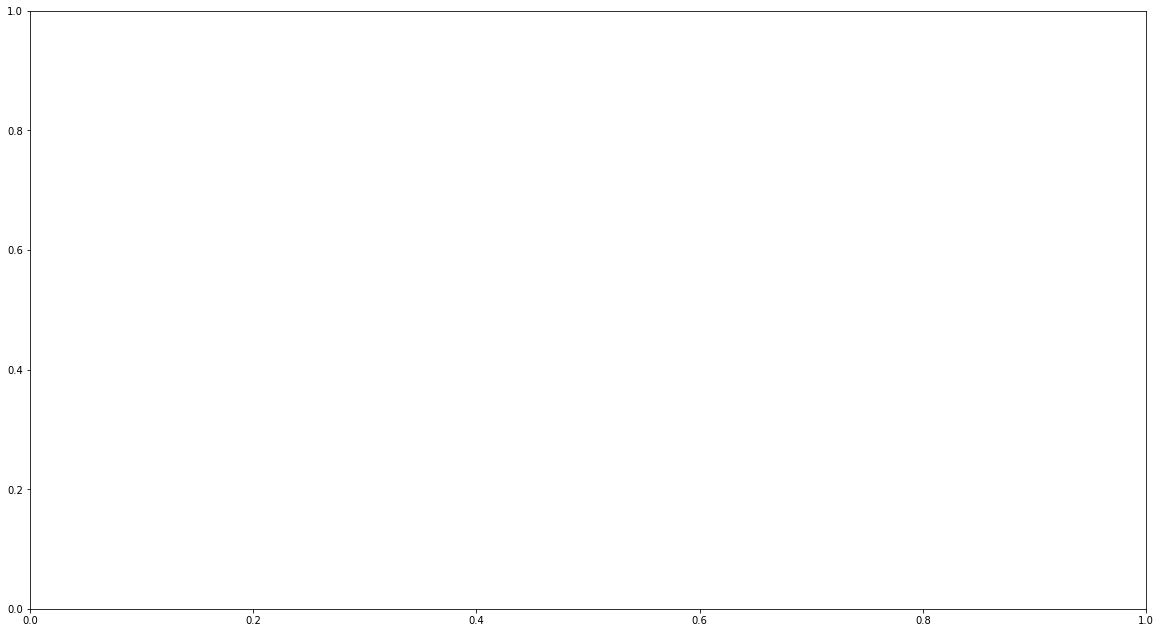

In [74]:
def communityLouvain(G):
    """
    This function applies the Louvain method for community detection on the City bike network.
    """

    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Compute Louvain method
    partition = community_louvain.best_partition(G, resolution=0.95, random_state=1)

    # Partition colormap
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)

    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Helsinki City Bike Network Communities (Louvain method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')

    # Watermark
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.9)

    plt.show()
    
communityLouvain(G)

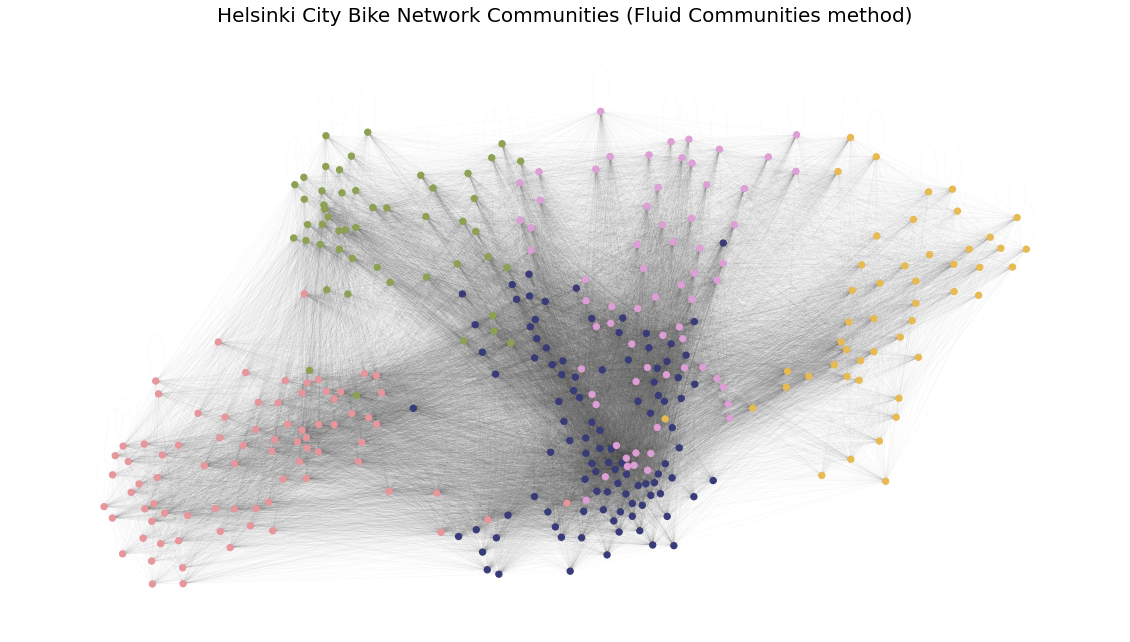

In [41]:
def communityFluid(G):
    """
    This function applies the Fluid Communities method for community detection on the City bike network.
    """

    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Compute Fluid method
    communities = nx.algorithms.community.asyn_fluid.asyn_fluidc(G, k=5, max_iter=10000, seed=1)
    
    # Assigning each node to its cluster
    partition = {}
    for idx, val in enumerate(communities):
        for k in val:
            partition[k] = idx
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Helsinki City Bike Network Communities (Fluid Communities method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')
    

    plt.show()
    
communityFluid(G)


In [66]:
from networkx import asyn_lpa, Graph


ImportError: ignored

AttributeError: ignored

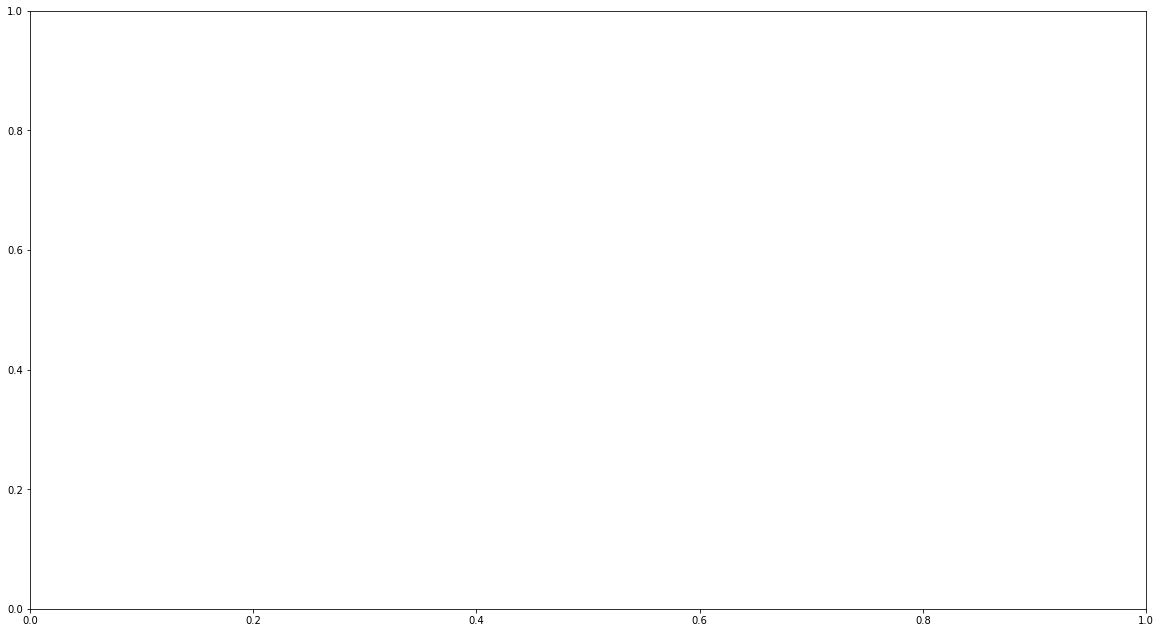

In [62]:
def communityFluid(G):
    """
    This function applies the Fluid Communities method for community detection on the City bike network.
    """

    # Figure
    fig, ax = plt.subplots(figsize=(20,11))

    # Compute Fluid method
    communities = nx.asyn_lpa_communities(G, weight=None, seed=None)
    
    # Assigning each node to its cluster
    partition = {}
    for idx, val in enumerate(communities):
        for k in val:
            partition[k] = idx
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Helsinki City Bike Network Communities (Fluid Communities method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')
    ax.text(0.99, 0.01, '© Github/Geometrein',
            verticalalignment='bottom',
            horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.9)

    plt.show()
    
communityFluid(G)


In [81]:
v=G.community_infomap()

AttributeError: ignored